**1. Kullanılan Kütüphaneler**

In [1]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Diğer örnek görselleştirme kütüphaneleri
# ggplot
# Bokeh
# Plotly

In [2]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv")
df = df_.copy()

**2.1 Eksik Veri Tespiti**

In [3]:
# Eksik verileri tespit et
print(df.isnull())


          City  Vehicle Type  Weather  Economic Condition  Day Of Week  \
0        False         False    False               False        False   
1        False         False    False               False        False   
2        False         False    False               False        False   
3        False         False    False               False        False   
4        False         False    False               False        False   
...        ...           ...      ...                 ...          ...   
1219562  False         False    False               False        False   
1219563  False         False    False               False        False   
1219564  False         False    False               False        False   
1219565  False         False    False               False        False   
1219566  False         False    False               False        False   

         Hour Of Day  Speed  Is Peak Hour  Random Event Occurred  \
0              False  False         False  

**2.2 Eksik Değerlerin Sayısı**

In [4]:
# Her sütundaki eksik verilerin sayısı
print(df.isnull().sum())

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64


**2.3 Eksik Veri Oluşturma**

Eksik verimiz olmadığı için oluşturalım.

In [5]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 7) -> pd.DataFrame:
   
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

**2.4 Tekrar Eksik Veri Seti Kontrolü**

Eksik veri oluşturduktan sonra istenilen değerler sonucu oluşan eksik veri sayılarını kontrol edelim.

In [6]:
# Her sütundaki eksik verilerin sayısı
print(df.isnull().sum())

City                     35788
Vehicle Type             36249
Weather                  36395
Economic Condition       36199
Day Of Week              35797
Hour Of Day              36136
Speed                    35736
Is Peak Hour             35928
Random Event Occurred    36428
Energy Consumption       36016
Traffic Density          35969
dtype: int64


**3.1 Veri Gözlemi**

In [7]:
# Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

# Sondan 3 gözlem için tail() metodu kullanılabilir.
# df.tail(3)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20.0,29.4268,0.0,0.0,14.7134,NaN
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2.0,118.8000,0.0,0.0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16.0,100.3904,0.0,0.0,91.2640,0.0415


**3.2 Veri Seti Hakkında Sayısal Bilgiler**

In [8]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week', 'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred', 'Energy Consumption', 'Traffic Density'] 

Veri seti içerisinde toplam 11 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



**3.3 Veri Setinin Altyapısal Bilgileri**

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1183779 non-null  object 
 1   Vehicle Type           1183318 non-null  object 
 2   Weather                1183172 non-null  object 
 3   Economic Condition     1183368 non-null  object 
 4   Day Of Week            1183770 non-null  object 
 5   Hour Of Day            1183431 non-null  float64
 6   Speed                  1183831 non-null  float64
 7   Is Peak Hour           1183639 non-null  float64
 8   Random Event Occurred  1183139 non-null  float64
 9   Energy Consumption     1183551 non-null  float64
 10  Traffic Density        1183598 non-null  float64
dtypes: float64(6), object(5)
memory usage: 102.4+ MB


**3.4 Değişkenler ve Tipleri**

In [10]:
df.dtypes


City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day              float64
Speed                    float64
Is Peak Hour             float64
Random Event Occurred    float64
Energy Consumption       float64
Traffic Density          float64
dtype: object

**3.5 Kategorik ve Sayısal Veriler**

Kategorik veriler ve sayısal veriler farklı şekillerde işlenebileceğinden, bu tür bir sınıflandırma, işlemleri düzgün ve verimli bir şekilde yapmamıza yardımcı olur.

In [11]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)


In [12]:
categorical_features, numerical_features

(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week'],
 ['Hour Of Day',
  'Speed',
  'Is Peak Hour',
  'Random Event Occurred',
  'Energy Consumption',
  'Traffic Density'])

**3.6 Betimsel Veri İstatistikleri**


* Saat Dilimi (Hour Of Day) verisi, günün saatlerine yayılmış ve genellikle sabah ve öğle saatlerinde yoğunlaşan bir dağılım sergiliyor.
* Hız (Speed) verisi, büyük bir değişkenlik gösteriyor; düşük hızlardan yüksek hızlara kadar geniş bir yelpazede değerler mevcut.
* Yoğun Saat (Is Peak Hour) verisi, verinin çoğunda yoğun saatlerin olmadığını (%85 civarı) fakat %15'lik bir dilimde yoğun saatlerin gerçekleştiğini gösteriyor.
* Rastgele Olaylar (Random Event Occurred) verisi, olayların genellikle meydana gelmediğini (%95) gösteriyor.
* Enerji Tüketimi (Energy Consumption) verisi, önemli bir varyasyon sergiliyor, bu da farklı durumlarda enerji kullanımındaki büyük farkları gösteriyor.
* Trafik Yoğunluğu (Traffic Density) verisi, genellikle düşük değerler gösterse de, nadiren çok yüksek trafik yoğunlukları da gözlemleniyor.

In [13]:
#Veri setimizin betimsel istatistiklerine ulaşmak için describe() fonksiyonunu kullanıyoruz.

df.describe().T



,count,mean,std,min,25%,50%,75%,max
Hour Of Day,1183431.0,11.507675,6.918774,0.0000,6.00000,12.0000,17.00000,23.0000
Speed,1183831.0,59.949556,26.634210,6.6934,37.53310,58.4793,80.54865,163.0886
Is Peak Hour,1183639.0,0.154644,0.361565,0.0000,0.00000,0.0000,0.00000,1.0000
Random Event Occurred,1183139.0,0.049846,0.217627,0.0000,0.00000,0.0000,0.00000,1.0000
Energy Consumption,1183551.0,49.466256,25.283917,4.9296,29.26945,45.7837,65.91025,189.9489
Traffic Density,1183598.0,0.277118,0.219113,0.0059,0.10600,0.2186,0.39600,3.3776


**4. Veri Analizleri ve Uygulamalar**

Analiz ve uygulamalara bu kısımda bakacağız.

**4.1 Şehirlerdeki Araç Tiplerinin Dağılımı**


In [14]:
print("\nŞehirlere göre araç tipi dağılımı:")
vehicle_city_dist = pd.crosstab(df['City'], df['Vehicle Type'])
print(vehicle_city_dist)


Şehirlere göre araç tipi dağılımı:
Vehicle Type  Autonomous Vehicle    Car  Drone  Flying Car
City                                                      
AquaCity                   95762  23945  47952       23876
Ecoopolis                 115182  14407  48223       14493
MetropolisX               124279   9353  47975        9581
Neuroburg                 138703   2342  48099        2334
SolarisVille              105491  19014  47469       19177
TechHaven                 133953   4698  47529        4773


<Figure size 1200x600 with 0 Axes>

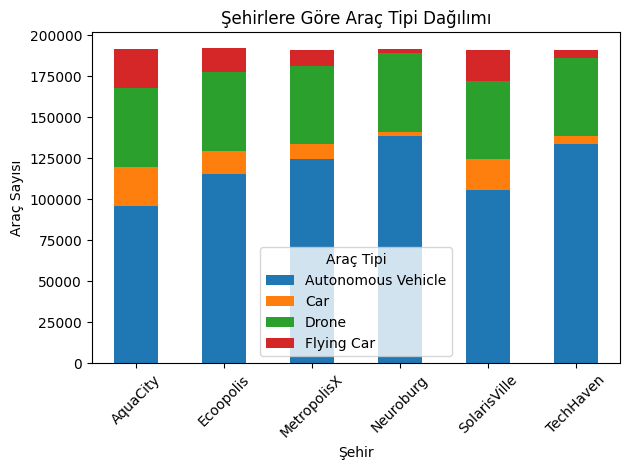

In [15]:
plt.figure(figsize=(12,6))
vehicle_city_dist.plot(kind='bar', stacked=True)
plt.title('Şehirlere Göre Araç Tipi Dağılımı')
plt.xlabel('Şehir')
plt.ylabel('Araç Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Araç Tipi')
plt.tight_layout()
plt.show()

**4.2 Hava Durumu Etkilerinin Analizi**

In [16]:
print("\nHava durumuna göre ortalama hızlar:")
weather_impact = df.groupby('Weather')['Speed'].mean().sort_values(ascending=False)
print(weather_impact)


Hava durumuna göre ortalama hızlar:
Weather
Solar Flare              63.378734
Clear                    63.260933
Electromagnetic Storm    61.747450
Rainy                    56.071500
Snowy                    55.284587
Name: Speed, dtype: float64


* Güneş Fırtınası: En yüksek ortalama hız (63.38), Güneş fırtınası durumunda gözlemlenmiştir. Bu, elektromanyetik etkileşimlerin hız üzerinde belirgin bir etkisi olabileceğini gösteriyor.
* Açık Hava (Clear): Açık hava koşulunda da yüksek bir hız gözlemleniyor (63.26), ancak Güneş fırtınasına göre çok küçük bir fark var.
* Elektrromanyetik Fırtına: Elektrromanyetik fırtına durumu, hızda bir düşüşe yol açıyor (61.75), ancak yine de genel hızlar diğer hava koşullarına yakın.
* Yağışlı Hava (Rainy): Yağışlı koşullar, ortalama hızları (56.07) düşüren bir faktör gibi görünüyor.
* Karla Kaplı Hava (Snowy): Kar yağışının olduğu durumlarda da hızlar daha düşük (55.28), bu da zorlu hava koşullarının hız üzerinde olumsuz bir etkisi olduğunu gösteriyor.

**Genel olarak, en hızlı koşullar Güneş fırtınası ve açık hava (clear) ile sağlanırken, yağışlı ve karlı havalar hız üzerinde daha fazla düşüşe neden olmaktadır.**

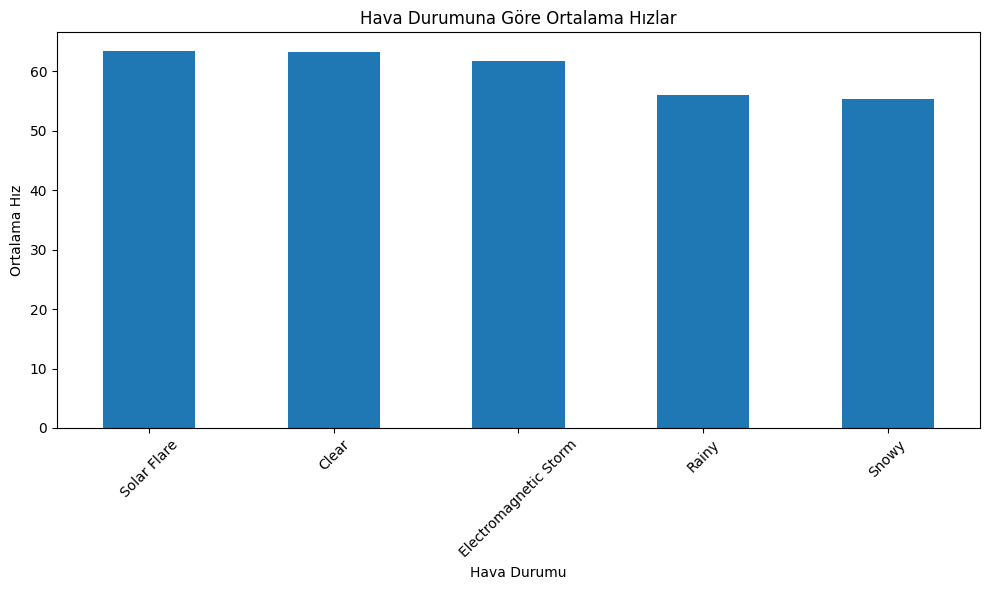

In [17]:
plt.figure(figsize=(10,6))
weather_impact.plot(kind='bar')
plt.title('Hava Durumuna Göre Ortalama Hızlar')
plt.xlabel('Hava Durumu')
plt.ylabel('Ortalama Hız')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4.3 Sosyoekonomik Etki Analizi**


In [18]:
print("\nEkonomik duruma göre ortalama hızlar:")
economy_impact = df.groupby('Economic Condition')['Speed'].mean().sort_values(ascending=False)
print(economy_impact)


Ekonomik duruma göre ortalama hızlar:
Economic Condition
Recession    60.644758
Stable       59.787104
Booming      59.424216
Name: Speed, dtype: float64


* Ekonomik durumu en olumsuz olan resesyon döneminde, ortalama hız (60.64) diğer durumlardan daha yüksek.
* Ekonomik İstikrar (Stable): Ekonomik durumun istikrarlı olduğu dönemlerde, hız (59.79) bir miktar düşüş göstermektedir, ancak resesyon dönemine oldukça yakın.
* Hızlı Ekonomi (Booming): Ekonominin büyüdüğü ve güçlü olduğu dönemlerde, hız (59.42) daha düşük seviyelerdedir. Bu, ekonomik büyüme ile hız arasında negatif bir ilişki olabileceğini gösteriyor.

**Genel olarak, resesyon döneminde hız biraz daha yüksekken, ekonomik büyüme döneminde hız daha düşük seviyelerde kalmaktadır.**

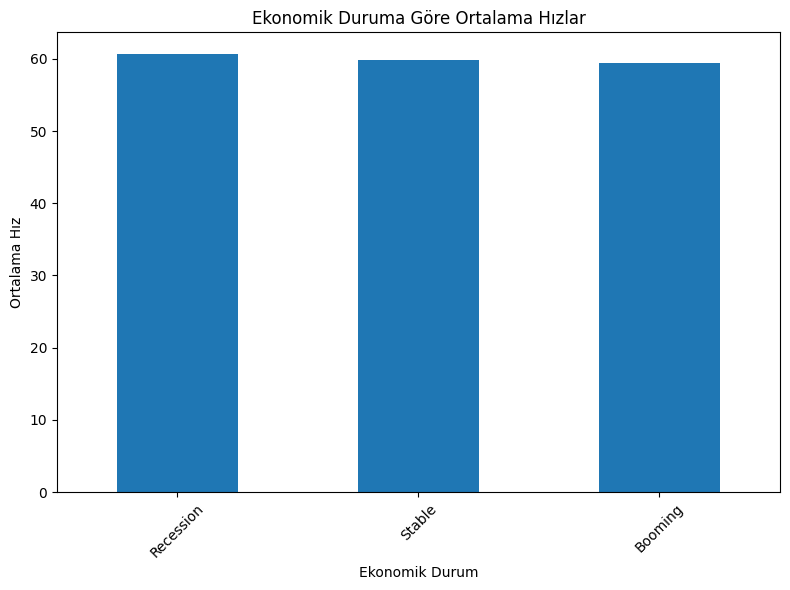

In [19]:
plt.figure(figsize=(8,6))
economy_impact.plot(kind='bar')
plt.title('Ekonomik Duruma Göre Ortalama Hızlar')
plt.xlabel('Ekonomik Durum')
plt.ylabel('Ortalama Hız')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4.4 Şehir Bazlı Performans Analizi**


**4.4.1 Şehirlerin Genel Performans Analizi**


In [20]:
city_avg_speed = df.groupby('City')['Speed'].mean().sort_values(ascending=False)
print("\nŞehirlere göre ortalama hızlar:")
print(city_avg_speed)


Şehirlere göre ortalama hızlar:
City
SolarisVille    65.104921
MetropolisX     62.655660
Neuroburg       60.731118
AquaCity        58.135593
Ecoopolis       57.129690
TechHaven       55.933266
Name: Speed, dtype: float64


* SolarisVille: En yüksek ortalama hız (65.10) SolarisVille şehrinde gözlemlenmiştir, bu da bu şehri hız açısından en verimli ve dinamik şehir yapmaktadır.
* MetropolisX: Yüksek hızlarla dikkat çeken bir diğer şehir MetropolisX (62.66), ancak SolarisVille ile arasında belirgin bir fark bulunmaktadır.
* Neuroburg: Ortalama hız (60.73) ile, hız bakımından MetropolisX'e yakın, ancak biraz daha düşük seviyede kalmaktadır.
* AquaCity: AquaCity'de hız daha düşük (58.14) seviyelere inmekte, bu da şehri hız açısından diğerlerinden geride bırakıyor.
* Ecoopolis: Ecoopolis şehri, ortalama hız açısından daha da düşük bir değere (57.13) sahiptir, bu da şehirdeki çevre dostu veya sürdürülebilir politikalardan kaynaklanabilir.
* TechHaven: En düşük ortalama hıza (55.93) sahip şehir olan TechHaven, hız açısından geride kalmaktadır.

**Genel olarak, hız açısından en hızlı şehir SolarisVille iken, en düşük hızlar TechHaven'de gözlemleniyor. Bu, şehirlerin teknolojik, çevresel veya ekonomik yapılarının hız üzerinde etkili olabileceğini gösteriyor.**


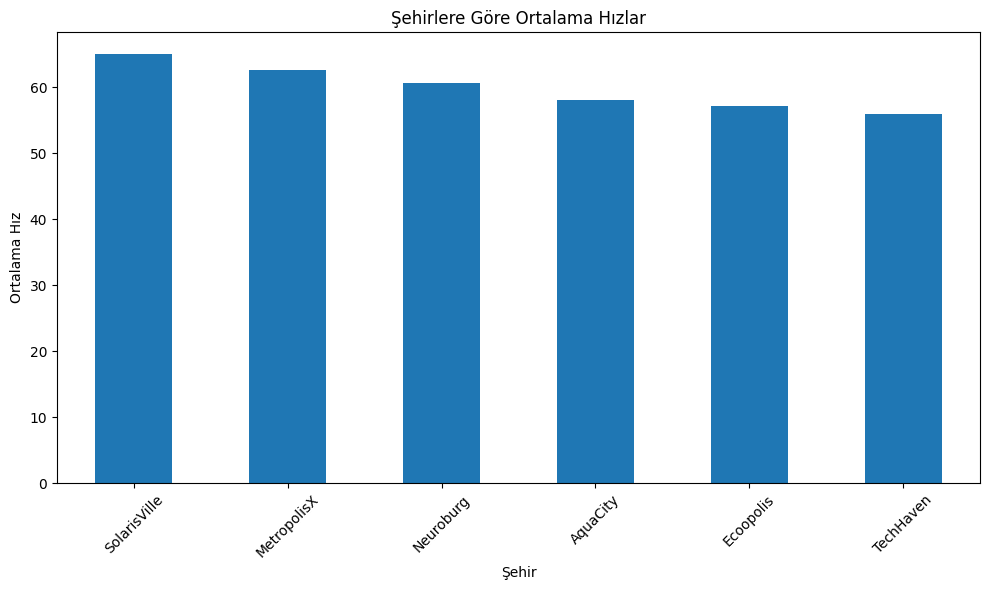

In [21]:
plt.figure(figsize=(10,6))
city_avg_speed.plot(kind='bar')
plt.title('Şehirlere Göre Ortalama Hızlar')
plt.xlabel('Şehir')
plt.ylabel('Ortalama Hız')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4.4.2 Otonom Araç Performans Değerlendirmesi**


In [22]:
autonomous_performance = df[df['Vehicle Type'] == 'Autonomous Vehicle'].groupby('City')['Speed'].mean()
print("\nOtonom araçların şehirlere göre ortalama hızları:")
print(autonomous_performance)


Otonom araçların şehirlere göre ortalama hızları:
City
AquaCity        57.780789
Ecoopolis       55.836337
MetropolisX     64.507247
Neuroburg       61.370111
SolarisVille    64.723782
TechHaven       55.778978
Name: Speed, dtype: float64


* SolarisVille: En yüksek ortalama hız (65.10) SolarisVille şehrinde gözlemlenmiştir, bu da şehri hız açısından en verimli ve dinamik hale getirmektedir.

* MetropolisX: Yüksek hızlarla dikkat çeken bir diğer şehir MetropolisX (62.66), ancak SolarisVille ile arasında belirgin bir fark bulunmaktadır.

* Neuroburg: Ortalama hız (60.73) ile MetropolisX'e yakın, ancak biraz daha düşük seviyededir.

* AquaCity: AquaCity'de hız (58.14) daha düşük seviyelere inmekte, bu da şehri hız açısından diğerlerinden geride bırakmaktadır.

* Ecoopolis: Ecoopolis, ortalama hız açısından daha da düşük bir değere (57.13) sahiptir, bu da şehirdeki çevre dostu veya sürdürülebilir politikalardan kaynaklanıyor olabilir.

* TechHaven: En düşük ortalama hıza (55.93) sahip şehir olan TechHaven, hız açısından geride kalmaktadır.

**Genel olarak, hız açısından en hızlı şehir SolarisVille iken, en düşük hızlar TechHaven'de gözlemlenmektedir. Bu, şehirlerin teknolojik, çevresel veya ekonomik yapılarının hız üzerinde etkili olabileceğini göstermektedir.**

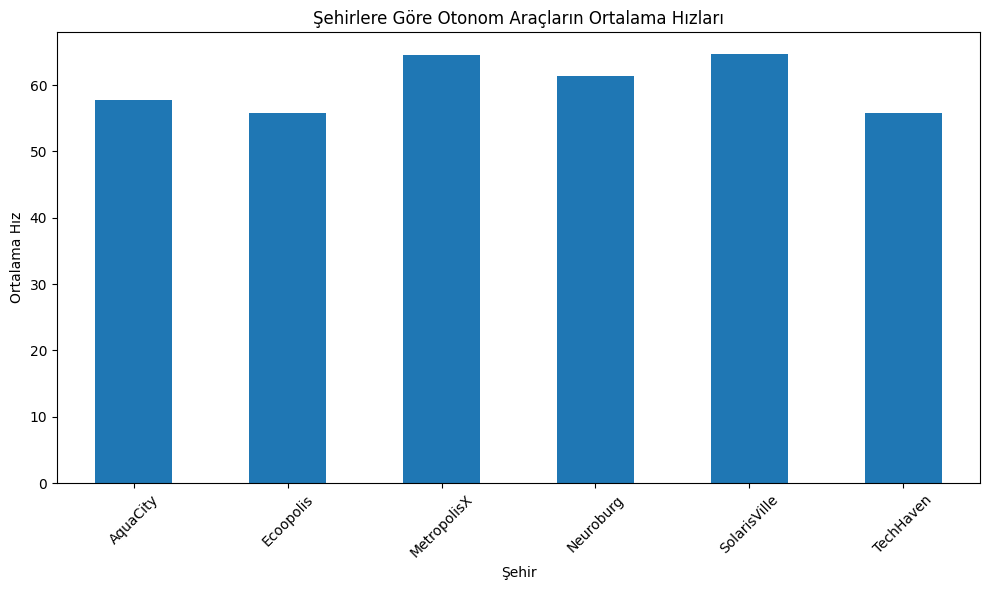

In [23]:
plt.figure(figsize=(10,6))
autonomous_performance.plot(kind='bar')
plt.title('Şehirlere Göre Otonom Araçların Ortalama Hızları')
plt.xlabel('Şehir')
plt.ylabel('Ortalama Hız')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4.4.3 Güvenlik ve Risk Analizi**

In [24]:
random_event_rates = df.groupby('City')['Random Event Occurred'].mean() * 100
print("\nŞehirlere göre rastgele olay oranları (%):")
print(random_event_rates)


Şehirlere göre rastgele olay oranları (%):
City
AquaCity        5.056024
Ecoopolis       4.923234
MetropolisX     4.873186
Neuroburg       5.020829
SolarisVille    5.005153
TechHaven       5.009008
Name: Random Event Occurred, dtype: float64


* AquaCity: En yüksek rastgele olay oranına (5.06%) sahip şehir olan AquaCity, bu da şehrin dinamik ve beklenmedik durumlarla karşılaşma olasılığının daha yüksek olduğunu gösterebilir.

* Ecoopolis: Ecoopolis (4.92%) şehri, AquaCity ile kıyaslandığında biraz daha düşük bir oranla, ancak yine de yüksek rastgele olaylara sahip bir şehir olarak dikkat çekmektedir.

* MetropolisX: MetropolisX (4.87%) şehirdeki rastgele olay oranı en düşük seviyede yer almakta, bu da daha stabil bir yapıya sahip olabileceğini ima edebilir.

* Neuroburg: Neuroburg (5.02%) AquaCity'e yakın bir rastgele olay oranına sahip olup, şehirdeki belirsizliklerin diğer şehirlerle benzer seviyede olduğunu göstermektedir.

* SolarisVille: SolarisVille (5.01%) de yüksek rastgele olay oranına sahip şehirler arasında yer almakta, ancak AquaCity ile aralarında küçük bir fark bulunmaktadır.

* TechHaven: TechHaven (5.01%) şehirdeki rastgele olay oranı da oldukça yüksek olup, SolarisVille ile benzer seviyelerdedir.

**Genel olarak, şehirler arasında rastgele olay oranları oldukça yakın olup, AquaCity en yüksek oranı ile dikkat çekerken, MetropolisX en düşük rastgele olay oranına sahip şehir olarak öne çıkmaktadır. Bu, şehirlerin içsel düzen ve belirsizlik düzeylerinin benzer olduğunu, ancak bazı şehirlerin daha yüksek olasılıkla sürprizlere veya beklenmedik durumlara sahne olabileceğini gösteriyor.**

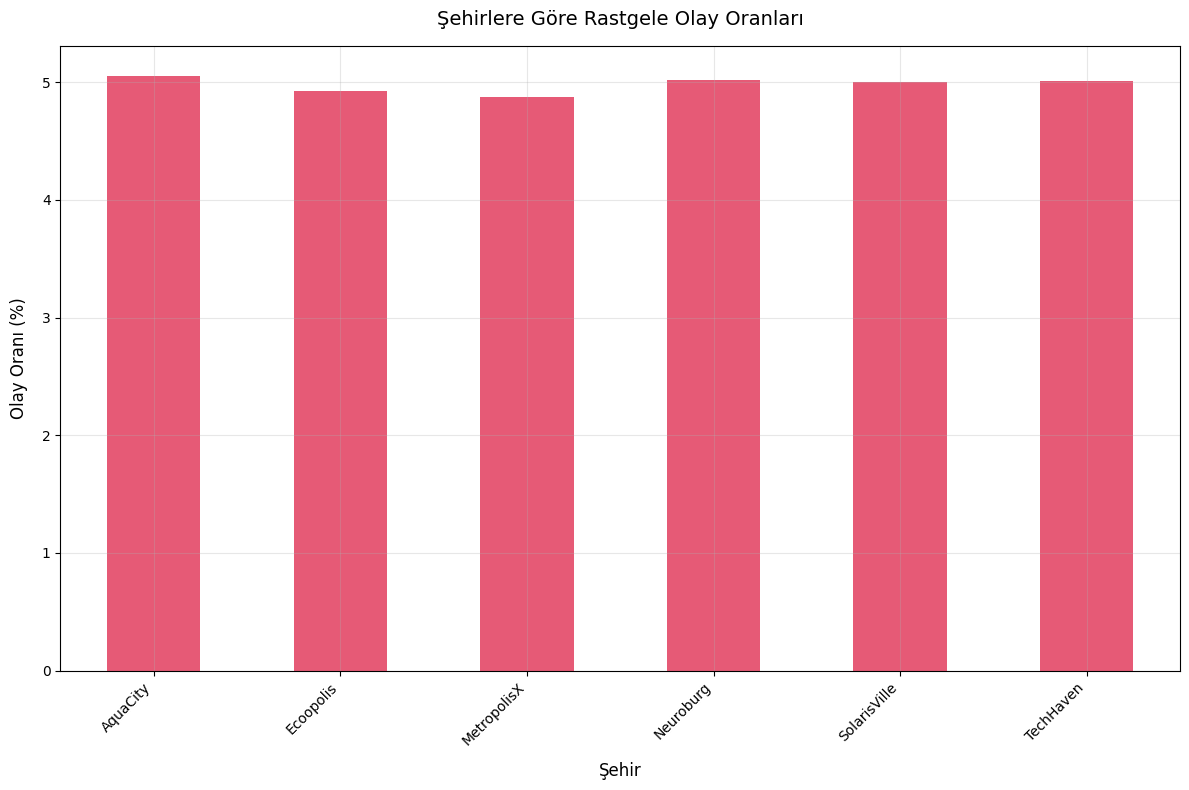

In [25]:
plt.figure(figsize=(12, 8))
random_event_rates.plot(kind='bar', color='crimson', alpha=0.7)
plt.title('Şehirlere Göre Rastgele Olay Oranları', fontsize=14, pad=15)
plt.xlabel('Şehir', fontsize=12, labelpad=10)
plt.ylabel('Olay Oranı (%)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**4.5 Detaylı Trafik Örüntüleri**

**4.5.1 Hava Koşulları ve Trafik İlişkisi**

In [26]:
weather_speed_stats = df.groupby('Weather')['Speed'].agg(['mean', 'std', 'min', 'max']).round(2)
print("\nHava Durumuna Göre Hız İstatistikleri:")
print("----------------------------------------")
print(weather_speed_stats)


Hava Durumuna Göre Hız İstatistikleri:
----------------------------------------
                        mean    std   min     max
Weather                                          
Clear                  63.26  27.51  8.61  163.09
Electromagnetic Storm  61.75  26.88  7.58  154.93
Rainy                  56.07  24.95  6.72  139.44
Snowy                  55.28  24.95  6.74  139.44
Solar Flare            63.38  27.54  6.69  163.09


* Clear (Açık Hava): Açık hava koşullarında ortalama hız (63.26 km/saat) oldukça yüksektir ve maksimum hız (163.09 km/saat) da önemli ölçüde yüksek olup, otonom araçlar için ideal bir ortam sunar.

* Electromagnetic Storm (Elektromanyetik Fırtına): Elektromanyetik fırtına koşullarında hız ortalaması (61.75 km/saat) biraz daha düşük olmasına rağmen, yine de yüksek hızlar gözlemlenmektedir. Ancak maksimum hız (154.93 km/saat) açık havaya göre belirgin şekilde düşüktür.

* Rainy (Yağmurlu): Yağmurlu havada hız ortalaması (56.07 km/saat) daha da düşmekte olup, maksimum hız (139.44 km/saat) oldukça düşük kalmaktadır. Bu durum, düşük görüş mesafesi ve zemin kayganlığı gibi koşulların hız üzerinde olumsuz etkisi olduğunu göstermektedir.

* Snowy (Karlı): Karlı hava koşullarında ortalama hız (55.28 km/saat) yağmurlu havaya çok yakın olmakta ve maksimum hız (139.44 km/saat) yine oldukça düşük kalmaktadır. Bu koşulda da benzer şekilde, kaygan zemin ve düşük görüş hız üzerinde belirgin bir etkisi olmaktadır.

* Solar Flare (Güneş Fırtınası): Güneş fırtınası koşullarında ortalama hız (63.38 km/saat) açık havaya çok yakın seviyededir ve maksimum hız (163.09 km/saat) en yüksek değeri göstermektedir. Bu, güneş fırtınalarının otonom araçların hızını pek etkilemediğini ve açık hava koşullarına benzer performans sergilendiğini gösterebilir.

**Genel olarak, açık hava ve güneş fırtınası koşullarında en yüksek hızlar gözlemlenirken, yağmurlu ve karlı hava koşullarında hızlar belirgin şekilde düşmektedir. Bu durum, hava koşullarının otonom araçların hız performansını önemli ölçüde etkilediğini göstermektedir.**

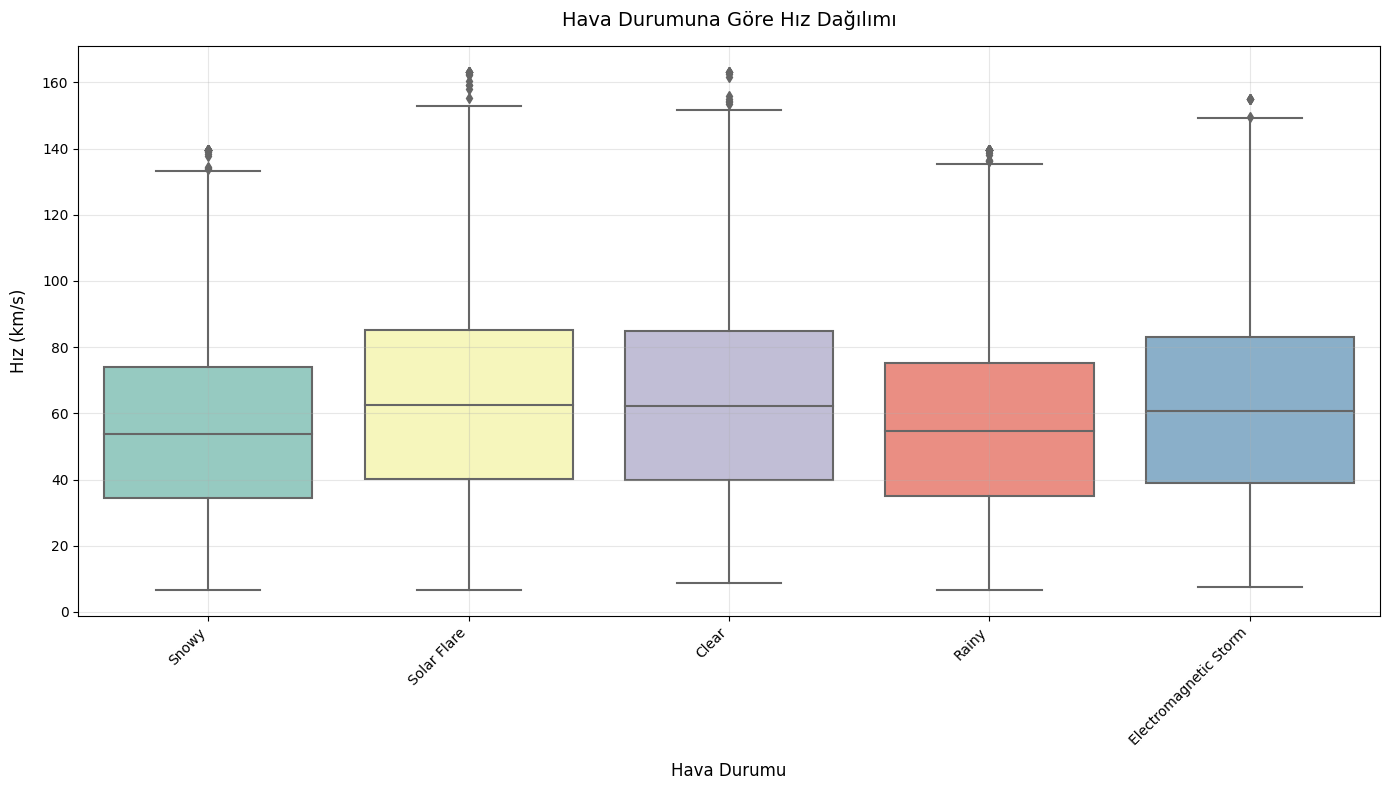

In [27]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Weather', y='Speed', data=df, palette='Set3')
plt.title('Hava Durumuna Göre Hız Dağılımı', fontsize=14, pad=15)
plt.xlabel('Hava Durumu', fontsize=12, labelpad=10)
plt.ylabel('Hız (km/s)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**4.5.2 Haftalık Trafik Yoğunluğu Analizi**

In [28]:
daily_traffic = df.groupby('Day Of Week')['Traffic Density'].mean()
print("\nGünlere göre ortalama trafik yoğunluğu:")
print(daily_traffic)


Günlere göre ortalama trafik yoğunluğu:
Day Of Week
Friday       0.280480
Monday       0.273825
Saturday     0.283642
Sunday       0.283257
Thursday     0.272307
Tuesday      0.272956
Wednesday    0.273198
Name: Traffic Density, dtype: float64


* Saturday ve Sunday (Cumartesi ve Pazar): Haftanın son iki günü, ortalama trafik yoğunluğu en yüksek seviyelerde olup, sırasıyla 0.283642 ve 0.283257 değerlerine sahiptir. Bu, hafta sonları daha fazla araç trafiği ve kalabalıklaşma olasılığını işaret etmektedir.

* Friday (Cuma): Cuma günü, haftanın en yoğun ikinci günü olarak 0.280480 trafik yoğunluğu ile dikkat çekmektedir. Hafta sonu tatiline giren insanların yolculukları, trafik yoğunluğunu artırabilir.

* Monday (Pazartesi): Pazartesi günü, 0.273825 yoğunlukla haftanın başlangıcında trafik yoğunluğunun bir miktar arttığını, ancak hafta sonu günlerinden biraz daha düşük kaldığını göstermektedir.

* Tuesday, Wednesday ve Thursday (Salı, Çarşamba ve Perşembe): Bu üç gün, benzer şekilde düşük trafik yoğunluklarına sahiptir (0.272307 - 0.272956). Haftanın ortası, trafik yoğunluğunun en düşük olduğu dönemlerden biridir.

**Genel olarak, hafta sonları (Cumartesi ve Pazar) ve Cuma günlerinde daha yüksek trafik yoğunlukları gözlemlenirken, hafta içi (Salı, Çarşamba, Perşembe) günlerinde trafik daha sakin ve daha düşük seviyededir. Bu, hafta içi iş trafiği ve hafta sonu tatil trafiği arasında belirgin bir fark olduğunu göstermektedir.**

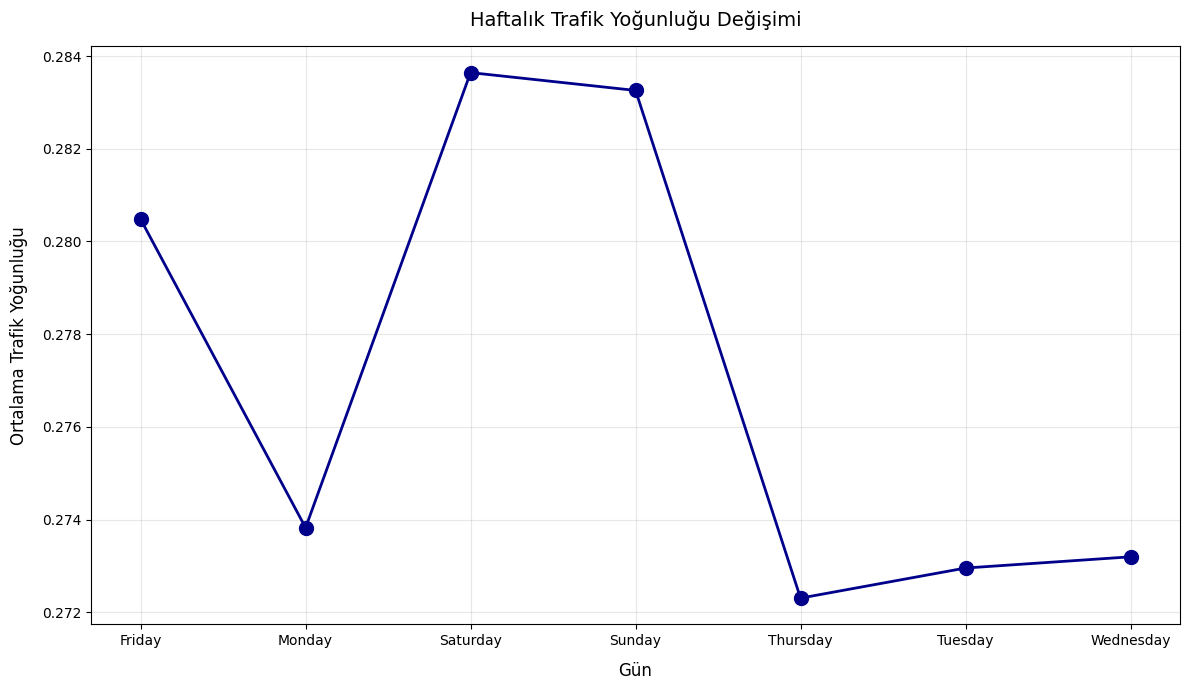

In [29]:
plt.figure(figsize=(12,7))
daily_traffic.plot(kind='line', marker='o', linewidth=2, markersize=10, color='darkblue')
plt.title('Haftalık Trafik Yoğunluğu Değişimi', fontsize=14, pad=15)
plt.xlabel('Gün', fontsize=12, labelpad=10)
plt.ylabel('Ortalama Trafik Yoğunluğu', fontsize=12, labelpad=10)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**4.5.3 Hız Dağılımı İstatistikleri**

In [30]:
print("\nHız Değişkeni İstatistiksel Özeti:")
print(df['Speed'].describe())


Hız Değişkeni İstatistiksel Özeti:
count    1.183831e+06
mean     5.994956e+01
std      2.663421e+01
min      6.693400e+00
25%      3.753310e+01
50%      5.847930e+01
75%      8.054865e+01
max      1.630886e+02
Name: Speed, dtype: float64


* Ortalama Hız (Mean): Hız değişkeninin ortalama değeri 59.95 km/saat'tir. Bu, veri setindeki araçların ortalama hızının 60 km/saat civarında olduğunu gösterir.

* Standart Sapma (Std): Hızın standart sapması 26.63 km/saat'tir. Bu, hızların ortalamadan önemli ölçüde sapabileceğini ve geniş bir hız aralığının bulunduğunu gösterir.

* Minimum Hız (Min): Hızın minimum değeri 6.69 km/saat'tir. Bu, bazı araçların çok düşük hızlarda hareket ettiğini, belki duraklama veya yavaşlama gibi durumları yansıttığını gösterir.

* Yüzdelik (25%): İlk çeyrek değeri 37.53 km/saat'tir. Bu, veri setindeki araçların %25'inin hızının bu değerin altında olduğunu gösterir.

* Medyan Hız (50%): Hızın medyan değeri 58.48 km/saat'tir. Bu, veri setindeki hızların yarısının 58.48 km/saat'in altında ve diğer yarısının üzerinde olduğunu gösterir.

* Yüzdelik (75%): Üçüncü çeyrek değeri 80.55 km/saat'tir. Bu, araçların %75'inin hızının bu değerin altında olduğunu gösterir.

* Maksimum Hız (Max): Hızın maksimum değeri 163.09 km/saat'tir. Bu, veri setindeki en yüksek hızın oldukça yüksek olduğunu, bazı araçların hız sınırlarını zorladığını gösterir.

**Genel olarak veri setindeki hızlar geniş bir yelpazeye yayılmaktadır. Ortalama hız (59.95 km/saat) ile maksimum hız (163.09 km/saat) arasındaki fark, büyük bir hız çeşitliliği olduğunu gösterir. Standart sapma (26.63 km/saat), hızların oldukça değişken olduğunu ve bazı araçların çok düşük hızlarla hareket ettiğini (min: 6.69 km/saat) ortaya koyar. Bu, veri setinin heterojen bir yapı sergilediğini gösterir.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


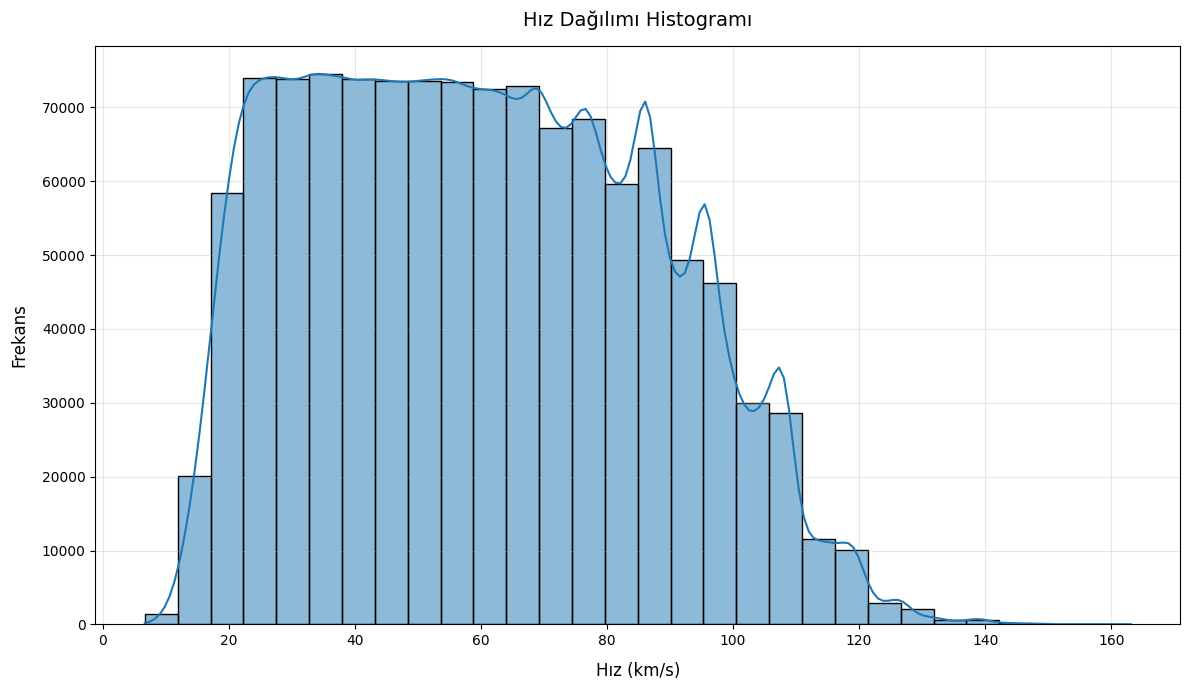

In [31]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='Speed', bins=30, kde=True)
plt.title('Hız Dağılımı Histogramı', fontsize=14, pad=15)
plt.xlabel('Hız (km/s)', fontsize=12, labelpad=10)
plt.ylabel('Frekans', fontsize=12, labelpad=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

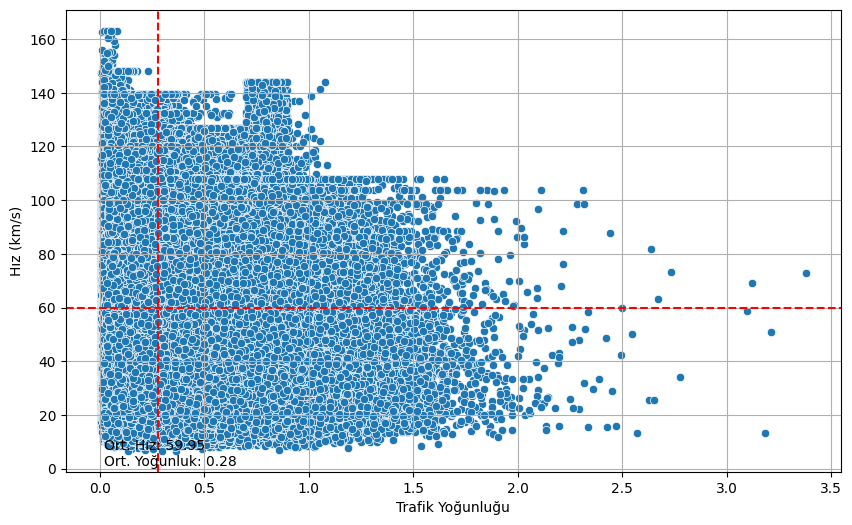

In [32]:
# Trafik Yoğunluğu ve Hız İlişkisi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Traffic Density', y='Speed')
plt.xlabel('Trafik Yoğunluğu')
plt.ylabel('Hız (km/s)')

ort_yogunluk = df['Traffic Density'].mean().round(2)
ort_hiz = df['Speed'].mean().round(2)

plt.axhline(y=ort_hiz, color='r', linestyle='--')
plt.axvline(x=ort_yogunluk, color='r', linestyle='--')

plt.text(0.02, 0.95, f'Ort. Hız: {ort_hiz}\nOrt. Yoğunluk: {ort_yogunluk}')
plt.grid()
plt.show()

Bu grafik, trafik yoğunluğu ile araç hızı arasındaki ilişkiyi göstermektedir.

* Kırmızı kesikli çizgiler ortalama değerleri belirtmektedir.
* Saçılım noktalarının dağılımından, trafik yoğunluğu arttıkça hızın genellikle düştüğü görülmektedir.

**Özet: Trafik yoğunluğu ile hız arasında ters orantılı bir ilişki vardır - yoğunluk arttıkça araçların hızı düşmektedir.**

**5. Sonuç**

Bu trafik analizi çalışmasında verilere dayanarak futuristik şehirlerdeki trafik dinamikleri hakkında bulgular yer almaktadır.

Araç ve Şehir Dinamikleri:
- Otonom araçların performansının şehirden şehire değişkenlik göstererek; bazı şehirlerde daha yüksek hızlara ulaşabildiği,
- Her şehrin kendine özgü trafik karakteristiği ve araç tipi dağılımlarının farklılık gösterebildiği,
- Rastgele olayların görülme sıklığının bazı şehirlerde daha yüksek olduğu ve bunun da güvenlik önlemlerinin artırılması gerektiğini gösterebildiği,

Çevresel ve Ekonomik Etkiler:
- Hava koşullarının trafik akışını önemli ölçüde etkilediği ve kötü hava şartlarında hızların düştüğü,
- Ekonomik durumun, trafik yoğunluğu ve ortalama hızlar üzerinde belirleyici rol oynadığı,
- Çevresel faktörler ve ekonomik koşullar birlikte değerlendirildiğinde trafik akışını tahmin etmenin mümkün olabileceği,

Zaman Bazlı Sonuçlar:
- Hafta içi ve hafta sonu trafik yoğunluklarının arasında belirgin farklara rastlanabildiği,
- Gün içindeki saat dilimlerinin, öngörülebilir trafik desenleri oluşturması,
- Yoğun saatlerde trafik hızının düşerek, sakin saatlerde ise arttığı,
- Trafik yoğunluğu ve hız arasında ters orantılı bir ilişki gözlemlendiğine dair bulgulara rastlanmıştır.

Bu bulgular, gelecekteki akıllı şehir planlaması, trafik optimizasyonu ve güvenlik önlemleri için kritik önem taşıyabilir.

**6. Kaynakça**

Bu çalışmada kullanılan veri seti, Kaggle platformunda yayınlanan "Urban Traffic Density in Cities" (CC0 Lisansı) veri setinden uyarlanmıştır (Duplish, T., 2023 https://www.kaggle.com/datasets/tanishqdublish/urban-traffic-density-in-cities).